In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data = pd.get_dummies(data, drop_first=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [6]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [7]:
data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data["sex_male"].value_counts()

1    676
0    662
Name: sex_male, dtype: int64

In [9]:
data["smoker_yes"].value_counts()

0    1064
1     274
Name: smoker_yes, dtype: int64

In [10]:
data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age'>

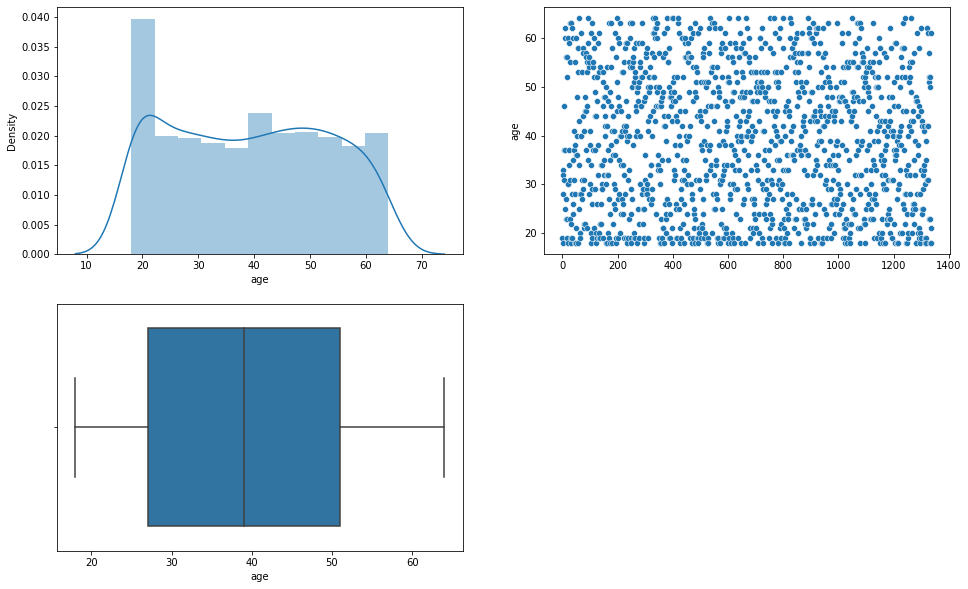

In [12]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["age"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["age"])
plt.subplot(2,2,3)
sns.boxplot(data['age'])

<AxesSubplot:xlabel='bmi'>

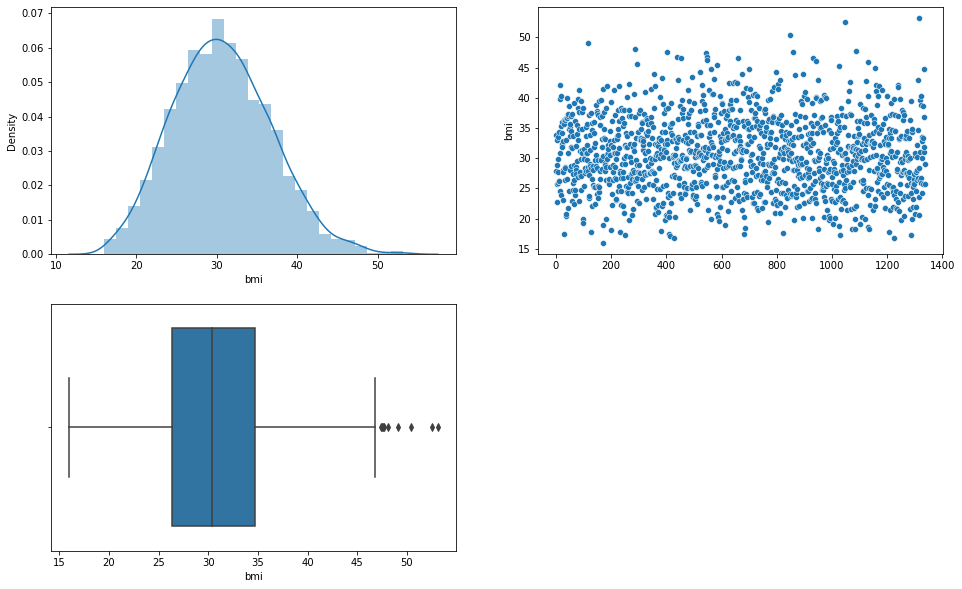

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["bmi"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["bmi"])
plt.subplot(2,2,3)
sns.boxplot(data['bmi'])

In [14]:
selected_column = data["bmi"]

std = selected_column.std()
avg = selected_column.mean()

tsp = avg + 3*std
tsm = avg - 3*std

outliers = data[((selected_column > tsp) | (selected_column < tsm))].index

data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='children'>

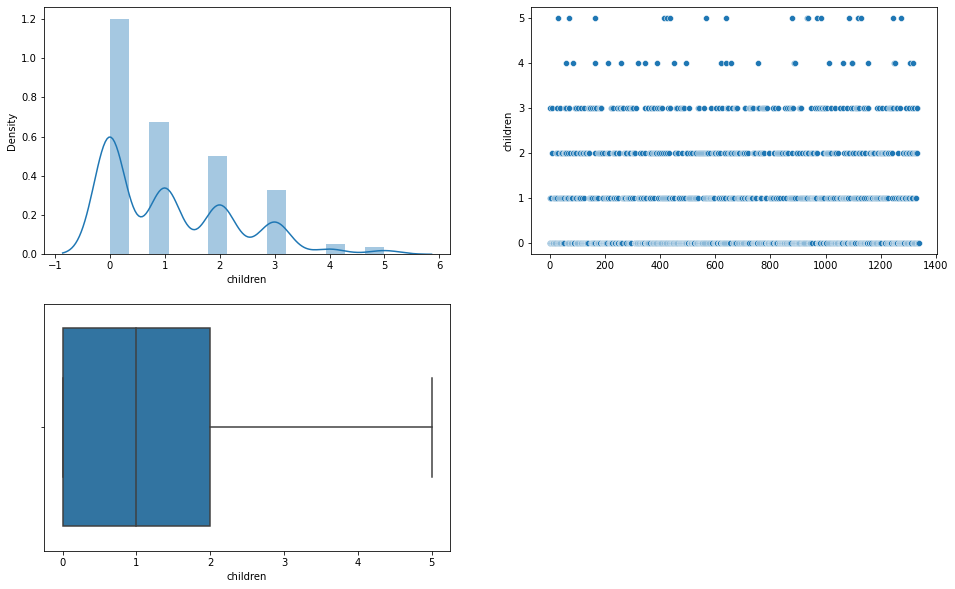

In [15]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["children"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["children"])
plt.subplot(2,2,3)
sns.boxplot(data['children'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1334 non-null   int64  
 1   bmi               1334 non-null   float64
 2   children          1334 non-null   int64  
 3   charges           1334 non-null   float64
 4   sex_male          1334 non-null   uint8  
 5   smoker_yes        1334 non-null   uint8  
 6   region_northwest  1334 non-null   uint8  
 7   region_southeast  1334 non-null   uint8  
 8   region_southwest  1334 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 58.6 KB


<AxesSubplot:>

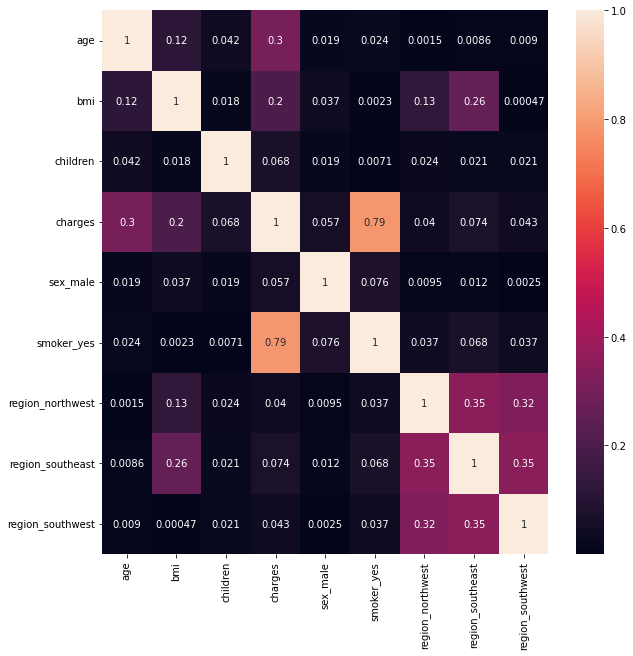

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [18]:
data.corr()["charges"].abs().sort_values(ascending=False)

charges             1.000000
smoker_yes          0.786536
age                 0.301360
bmi                 0.200799
region_southeast    0.073863
children            0.067569
sex_male            0.057165
region_southwest    0.043143
region_northwest    0.039826
Name: charges, dtype: float64

In [19]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
lr.score(Xtest, ytest)

0.7184302486074059

In [23]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(Xtrain, ytrain)
dtr.score(Xtest, ytest)

0.7086626266266721

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators = 100, random_state=0)
rfr.fit(Xtrain, ytrain)
rfr.score(Xtest, ytest)

0.839353089538327

In [25]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(Xtrain, ytrain)
xgb.score(Xtest, ytest)

0.8007455197721791

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc1=StandardScaler()
Xtrains = sc1.fit_transform(Xtrain)
Xtests = sc1.transform(Xtest)

sc2=StandardScaler()
ytrains = sc2.fit_transform(ytrain.values.reshape(-1,1))
ytests = sc2.transform(ytest.values.reshape(-1,1))

svr = SVR(kernel='rbf')
svr.fit(Xtrains, ytrains.ravel())

svr.score(Xtests, ytests)

0.824640430339062

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
score = cross_val_score(rfr, X=Xtrain, y=ytrain, cv=4)
score, score.mean(), score.std()

(array([0.82516612, 0.88299533, 0.82754418, 0.77021848]),
 0.8264810255257061,
 0.039881698401659456)

In [29]:
score1 = cross_val_score(xgb, X=Xtrain, y=ytrain, cv=4)
score1, score1.mean(), score1.std()

(array([0.80544222, 0.84365806, 0.79886179, 0.71584308]),
 0.7909512892406991,
 0.04661494130210229)